# TP noté n°2 : Introduction à la compression

Ce TP a pour objectif de donner une introduction pratique à certaines techniques élémentaires de compression. Il vous permettra également d'appréhender la création et la lecture d'images via python.

## Partie 1 : Présentation de la bibliothèque PIL

PIL (python image library) est une bibliothèque python permettant de manipuler des images. Si PIL n'est pas installée sur votre machine, vous pouvez entrer la commande suivante (dans un terminal par exemple) pour l'installer : 
```
pip install Pillow
```

La bibliothèque PIL contient notamment un module `Image` qui nous sera utile dans ce TP. On peut l'importer par :
```
from PIL import Image
```

Cette partie a pour but de vous faire manipuler quelques fonctions élémentaires de PIL afin que vous puissiez en comprendre le mécanisme. Pour plus de détails, un tutoriel assez complet est disponible à l'adresse suivante : https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

Dans ce TP, nous allons manipuler des images en noir et blanc, sous la forme de grille de pixels. Pour définir une nouvelle image, on utilise la fonction `new` du module `Image`, en précisant le format de l'image et sa taille. Le format d'une image en noir et blanc est `"L"`, et sa taille doit êtrte donnée comme un couple d'entiers. Par exemple, pour initialiser une image de taille $(100 \times 100)$, on utilisera :
```
img = Image.new( 'L', (100, 100))
```
La variable `img` contiendra alors l'objet-image qui a été créé.

Ensuite, pour afficher l'image `img`, on peut entrer `display(img)` qui affichera l'image sous la cellule d'exécution. On peut également afficher l'image dans un logiciel multimédia grâce à `img.show()`.

**Question 1.** En n'oubliant pas d'importer le module `Image` de la bibliothèque `PIL`, initialiser dans une variable `img` une image de taille $(200 \times 40)$. Puis, afficher l'image à votre convenance.

In [1]:
from PIL import Image
img=Image.new('L',(200,40))
img.show()

Comme l'image donne un rectangle applati horizontalement, on déduit que la première dimension correspond à la largeur de l'image, et la seconde sa hauteur.

On observe également que, par défaut, les pixels de l'image sont noirs. Les pixels noirs sont représentés par la valeur entière `0`, tandis que les blanc par la valeur `255`. Les valeurs entre  $1$ et $254$ correspondent à des niveaux de gris que l'on n'utilisera pas dans ce TP.

Pour modifier la valeur d'un pixel d'une image `img`, on peut utiliser
```
img.putpixel((i,j), x)
```
où `(i,j)` désigne la position du pixel à modifier, et `x` la valeur à lui affecter.

**Question 2.** Modifier en blanc le pixel de coordonnées $(50, 10)$ de l'image précédemment créée. Puis, afficher l'image.

In [2]:
img.putpixel((50,10), 255)
img.show()

On observe que le pixel modifié (assez petit) se situe plutôt en haut à gauche de l'image. Cela signifie que les coordonnées $(0, 0)$ correspondent au pixel tout en haut à gauche.

La fonction `zoom` fournie dans la cellule suivante vous permet de créer une image "zoomée". Elle prend en entrée une image `image` et retourne une autre image en sortie. Elle ne modifie donc pas la variable `image`.

La fonction prend également en entrée un second argument, qui correspond au facteur de zoom. Par défaut, il est initialisé à $4$, mais on peut en choisir un autre.

In [3]:
from PIL import Image
def zoom(image, zoom_factor=4):
    im = image
    x, y = im.size
    im = im.resize([zoom_factor*x, zoom_factor*y], Image.NEAREST)
    return im

**Question 3.** Utiliser la fonction précédemment codée pour afficher deux versions zoomées de votre image :
1. l'une avec le facteur de zoom standard $4$ (donc, en ne donnant pas de second argument à la fonction)
2. l'autre avec un facteur de zoom $2$

In [4]:
def deux_zoom(a):
    zoom(img, zoom_factor=4).show()
    zoom(img, zoom_factor=2).show()
    
deux_zoom(img)
    

En machine, une image en noir et blanc peut être représentée par une liste de bits : $0$ si le pixel est noir et $1$ s'il est blanc. Les deux fonction suivantes vous permettent de passer d'une image à une liste de bits, et réciproquement.

In [5]:
def img_to_bits(image):
    res = []
    for x in range(image.height):
        for y in range(image.width):
            if image.getpixel((y,x)) != 0:
                res.append(1)
            else:
                res.append(0)
    return res

def bits_to_img(bits, height, width):
    img = Image.new( 'L', (width, height), "black")
    for i in range(height):
        for j in range(width):
            if bits[i*width + j] == 1:
                img.putpixel((j,i), 255)
    return img

# bits_to_img(img_to_bits(zoom(img)), 100, 100)

**Question 4.** Créer la liste de bits `[0, 1, 1, 0, 1, 0, 0, 0]`, puis l'afficher sous la forme d'une image de hauteur $2$ et de largeur $4$.

*Remarque : comme l'image est très petite, on pourra utiliser un zoom avec un facteur important*

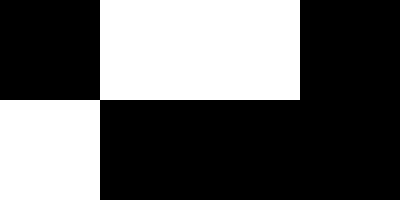

In [6]:
L=[0, 1, 1, 0, 1, 0, 0, 0]
b=bits_to_img(L, 2, 4)
zoom(b, zoom_factor=100)

Les trois fonctions suivantes vous permettent de créer des images avec des formes géométriques que l'on essaiera de compresser par la suite :
1. la fonction `diagonal(h)` crée une diagonale blanche sur un fond carré noir de coté `h`
2. la fonction `cross(h)` crée une croix noire sur un fond carré `blanc` de coté `h`
3. la fonction `square(h, r)` crée un carré noir de côté `r` au centre d'un fond blanc de côté `h`
   
**Attention !** Ces fonctions retournent une liste de bits, et non une image.

In [7]:
def diagonal(h):
    return [1 if i % (h+1) == 0 else 0 for i in range(h**2) ]

def cross(h):
    return [0 if (i % (h+1) == 0) or (i % (h-1) == 0) else 1 for i in range(h**2) ]

def square(h, r):
    res = []
    t = (h-r)//2
    for i in range(t):
        res += [1]*h
    for i in range(r):
        res += [1]*t + [0]*r + [1]*(h-t-r)
    for i in range(h-t-r):
        res += [1]*h
    return res


**Question 5.** Afficher des exemples d'images issues de ces trois fonctions.

In [8]:
c=bits_to_img(diagonal(4),4,4)
zoom(c, zoom_factor=20)
diagonal(4)


[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]

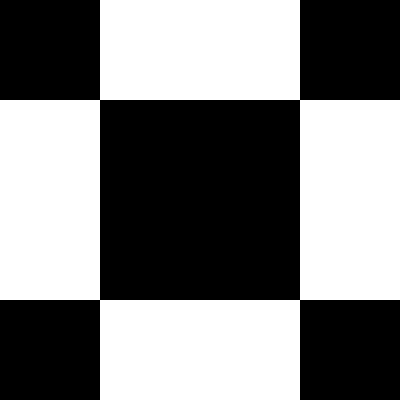

In [9]:
d=bits_to_img(cross(4),4,4)
zoom(d,zoom_factor=100)

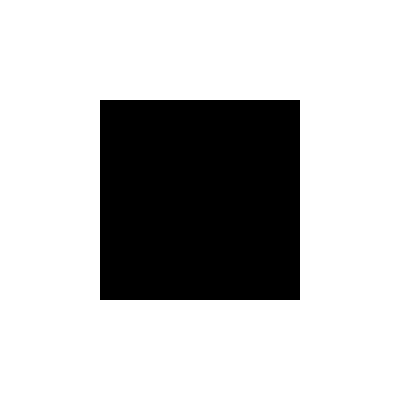

In [10]:
e=bits_to_img(square(4,2),4,4)
zoom(e, zoom_factor=100)

## Partie 2 : Codage RLE brut

On rappelle que le codage par plage, aussi nommé RLE (*run-length encoding*), d'une suite de bits $(m_1, \dots, m_n)$ peut être défini de la sorte. On identifie d'abord le premier bit du message, puis on créer une liste d'entiers correspondant aux longueurs de plages, c'est-à-dire aux nombre de bits consécutivement égaux. Par exemple, pour le message $11000101100000001$, le premier bit est $1$, et la liste d'entiers est $(2, 3, 1, 1, 2, 7, 1)$. 

**Question 6.** Écrire une fonction `RLE(message)` qui prend en entrée un message binaire `message` et qui retourne un couple `(b, rle)` où
- `b` est le premier bit de `message`
- `rle` est une liste d'entiers décrivant les longueurs de plage

In [11]:
def RLE(message):
    # Fonction pour effectuer la compression Run-Length Encoding (RLE) sur une liste 'message'
    rle = []  # Liste pour stocker les longueurs des séquences
    j = 0     # Indice pour parcourir la liste 'message'

    # Parcourir la liste 'message'
    while j < len(message):
        s = 1  # Initialiser la longueur de la séquence à 1

        # Compter la longueur de la séquence identique
        while j < len(message) - 1 and message[j] == message[j + 1]:
            s = s + 1
            j += 1

        # Ajouter la longueur de la séquence à la liste 'rle'
        rle.append(s)

        j += 1  # Passer à l'élément suivant dans la liste

    b = message[0]  # Prendre le premier élément de la liste 'message' comme base
    return b, rle  # Retourner la base et la liste des longueurs des séquences


m=[1,1,0,0,0,1,1,0,1]
RLE(m)

    

(1, [2, 3, 2, 1, 1])

**Question 7.** Écrire la fonction `inverse_RLE(b, rle)` qui effectue le procédé inverse du codage RLE. Cette fonction doit don prendre en entrée un bit `b` et une liste d'entiers `rle`, et retourner la liste de bits `message` qui a servi pour obtenir le codage RLE `(b, rle)`.

In [12]:
def inverse_RLE(b, rle):
    # Fonction pour effectuer la décompression de Run-Length Encoding (RLE)
    L = []  # Liste pour stocker la séquence décompressée
    j = 0   # Indice pour parcourir la liste 'rle'

    # Parcourir la liste 'rle'
    for i in range(0, len(rle)):
        # Ajouter 'b' à la liste 'L' autant de fois que spécifié par la longueur de la séquence 'rle[i]'
        while rle[i] != 0:
            L.append(b)
            rle[i] = rle[i] - 1
        
        # Alterner 'b' entre 0 et 1 pour chaque nouvelle séquence
        b = (b + 1) % 2

    return L  # Retourner la séquence décompressée       


**Question 8.** Tester vos deux fonctions précédentes (`RLE` et `inverse_RLE`), notamment avec l'exemple donné en début de partie 2.

In [13]:
RLE([1,1,0,0,0,1,1,0,1])
inverse_RLE(1,[2, 3, 2, 1, 1])

[1, 1, 0, 0, 0, 1, 1, 0, 1]

**Question 9.** Quel est le code RLE de l'image diagonale de côté $20$ ?

In [14]:
RLE(diagonal(4))

(1, [1, 4, 1, 4, 1, 4, 1])

## Partie 3 : Codage RLE avec un codage d'entiers

Si `(b, rle)` est la sortie d'un codage RLE, les entiers stockés dans la liste `rle` ne sont pas représentés par une suite de bits. On a vu lors du cours sur le codage de source qu'il y avait plusieurs méthodes pour encoder une suite d'entier sous forme binaire. Les fonctions suivantes permettent d'utiliser le codage "Gamma" dont la longueur moyenne est proche de la borne entropique pour de nombreuses distributions d'entiers. Pour plus de détails, voir la page wikipedia : https://fr.wikipedia.org/wiki/Codage_gamma

In [15]:

def unaire(n):
    return [0]*n + [1]


def decomp(n):
    if n == 0:
        return [0]
    res = []
    while n != 0:
        res.append(n % 2)
        n >>= 1
    return res


def inverse_decomp(d):
    res = 0
    p = 1
    for x in d:
        res += x*p
        p <<= 1
    return res

def gamma(n):
    d = decomp(n)
    s = len(d)
    return unaire(s) + d

def inverse_gamma(c):
    i = 0
    while c[i] == 0:
        i += 1
    d = c[i+1:]
    n = inverse_decomp(d)
    return n

# Encodage gamma d'une liste d'entiers L
def gamma_liste(L):
    res = []
    for n in L:
        res += gamma(n)
    return res
    
# Décodage gamma d'une liste d'entiers codés L
def inverse_gamma_liste(L):
    res = []
    N = len(L)
    i = 0
    s = 1
    while i < N:
        if L[i] == 0:
            i += 1
            s += 1
        else:
            n = inverse_decomp(L[i+1:i+1+s])
            res.append(n)
            i = i+s+1
            s = 1            
    return res

On souhaite représenter le codage RLE d'un message binaire comme une unique liste de bits. Pour cela, on va simplement concaténer le bit `b` du codage RLE  avec la représentation binaire de la suite d'entier `rle`. Cette représentation binaire peut être obtenue avec la fonction `gamma_liste` donnée ci-dessus.

Plus précisément, l'algorithme est le suivant. Pour un message `message` en entrée :
1. Calculer `(b, rle)` le codage RLE de `message`.
2. Notons $n_1, \dots, n_k$ les entiers présents dans la liste `rle`. Créer la liste `L` des codages gamma des entiers $[n_1 - 1, \dots, n_k-1]$.
3. Retourner la concaténation de `[b]` avec la liste `L`.

**Question 10.** Écrire une fonction `RLE_gamma(message)` qui retourne la représentation du codage RLE de `message` sous forme de liste de bits.

*Voici quelques valeurs de tests si besoin :*

message | encodage
:---: | :---:
`[0, 0, 0, 0]` | `[0, 0, 0, 1, 1, 1]`
`[1]*100` | `[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]` 
`[0, 1]*5` | `[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]` 
`diagonal(3)` | `[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]` 


In [16]:
def RLE_gamma(message):
    # Calculer le codage RLE du message
    rle_result = RLE(message)

    if rle_result is None:
        return None

    # Extraire le premier bit et la liste rle
    b, rle = rle_result

    # Créer la liste L des codages gamma des entiers [n_1 - 1, ..., n_k - 1]
    L = gamma_liste([n - 1 for n in rle])

    # Retourner la concaténation de [b] avec la liste L
    return [b] + L

# Exemples d'utilisation
print(RLE_gamma([0,0,0,0]))
print(RLE_gamma([1] * 100))
print(RLE_gamma([0, 1] * 5))
print(RLE_gamma(diagonal(3)))


[0, 0, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]


**Question 11.** Écrire `inverse_RLE_gamma(L)`, la fonction inverse de la fonction demandée à la question précédente.

Dorénavant, comme l'encodage est représenté comme une liste de bits, la taille de l'encodage est la longueur de la liste. On appelle **facteur de compression** le ratio entre la taille du message encodé et la taille du message originel.

Une image carrée de côté $h$ a taille $h^2$. Si l'on considère le codage `RLE_gamma` des images complètement noires, les tailles et les facteurs de compression de ces images sont les suivants :

Coté $h$ | Taille de l'image originale | Taille de l'image compressée | Facteur de compression
 :---: | :---: | :---: | :---:
 10 | 100 | 16 | 0.16
 20 | 400 | 20 | 0.050
 50 | 2500 | 26 | 0.0104
 100 | 10000 | 30 | 0.0030
 1000 | 1000000 | 42 | 0.000042


**Question 12.** Calculer les facteurs de compression des images "diagonales", pour les mêmes valeurs de $h$ que le tableau précédent. Parmi ces valeurs de $h$, lesquelles donnent une "bonne" compression ?

In [17]:
k2=len(diagonal(20))
l2=len(RLE_gamma(diagonal(20)))
print(k2)
print(l2)
print(l2/k2)
print()
k3=len(diagonal(50))
l3=len(RLE_gamma(diagonal(50)))
print(k3)
print(l3)
print(l3/k3)
print()
k4=len(diagonal(100))
l4=len(RLE_gamma(diagonal(100)))
print(k4)
print(l4)
print(l4/k4)
print()
k5=len(diagonal(1000))
l5=len(RLE_gamma(diagonal(1000)))
print(k5)
print(l5)
print(l5/k5)
#On voit que le ratio devient de plus en plus petit donc les compressions sont bonnes

400
270
0.675

2500
788
0.3152

10000
1786
0.1786

1000000
23980
0.02398


La fonction suivante permet de créer un damier (succession de pixels blanc et noirs) de taille arbitraire

In [18]:
def damier(h):
    return [0 if (i+(i//h)) % 2 == 0 else 1 for i in range(h**2) ]

**Question 13.** Reprendre la question précédente avec des damier de taille $h$. La compression est-elle toujours bonne ? Interpréter.

In [19]:
l2=len(RLE_gamma(damier(20)))
k2=len(damier(20))
print(k2)
print(l2)
print(l2/k2)
print()
l4=len(RLE_gamma(damier(100)))
k4=len(damier(100))
print(k4)
print(l4)
print(l4/k4)
print()
k5=len(damier(1000))
l5=len(RLE_gamma(damier(1000)))
print(k5)
print(l5)
print(l5/k5)
#Ici on voit justement l'inverse plus le côté h devient grand et plus la compression devient mauvaise.

400
1144
2.86

10000
29704
2.9704

1000000
2997004
2.997004


## Partie 4 : transformée de Burrows-Wheeler

La transfomée de Burrows--Wheeler va nous permettre de régler le problème de la compressin du damier, apparu dans la partie précédente. On rappelle ci-dessous les différents algorithmes (vus en cours) pour opérer cette transformée.


#### Algorithme de rotation `rotate(L, i)`
- **Entrée :** une liste de bits $L$ de longueur $n$, et un entier `i` compris entre $0$ et $n-1$
- **Sortie :** la liste des éléments de `L`, permutée de manière cyclique de $i$ rangs vers la droite
1. Stocker dans `A` la liste des `i` derniers bits de `L`
2. Stocker dans `B` le reste de la liste `L`
3. Retourner la concaténation de `A` et de `B` (dans cet ordre)


#### Transformée de Burrows-Wheeler `BW(L)`
- **Entrée :** une liste de bits `L` de longueur $n$
- **Sortie :** un entier `pos` et une liste de bits `R`  de même longueur $n$
1. Stocker dans un tableau `Tab` la liste de toutes les rotations de `L`, en commençant par la rotation d'ordre $i = 0$, et en terminant par celle d'indice $i = n - 1$
2. Trier `Tab`
3. Retrouver l'indice de la liste `L` dans `Tab`, et le stocker dans `pos`
4. Stocker dans `R` la liste des derniers bits de toutes les listes de `Tab`
5. Retourner `pos` et `R`


#### Transformée inverse de Burrows-Wheeler
- **Entrée :** un entier `pos` et une liste de bits `L`  de même longueur $n$
- **Sortie :** une liste de bits `R` de longueur $n$
1. Initialiser un tableau `Tab` de $n$ listes vides
2. Itérer $n$ fois :
    1. Pour tout $i \in \{0, \dots, n-1 \}$ :
        - Ajouter l'élément `R[i]` au début de la liste `Tab[i]`
    2. Trier `Tab`
3. Retourner `Tab[pos]`

**Question 14.** Écrire la fonction de rotation `rotate(L, i)`.

In [34]:
def rotate(L, i):
    # Fonction pour effectuer une rotation circulaire à gauche sur la liste L
    n = len(L)

    # Vérifier si i est en dehors de la plage valide
    if i > n - 1 or i < 0:
        return print("Entrer un numéro compris entre 0 et la longueur de la liste")

    # Effectuer la rotation circulaire
    A = L[n - i:]  # Partie droite de la liste après la rotation
    B = L[:n - i]  # Partie gauche de la liste après la rotation

    return A + B

rotate([1,0,0,1,0],2)

[1, 0, 1, 0, 0]

**Question 15.** Écrire une fonction `BW(L)` qui retourne la transformée de Burrows-Wheeler de `L` sous la forme d'un couple `(pos, R)`, où `pos` est un entier et `R` une liste de bits.

*Indication : pour trier une liste `X`, on peut utiliser la méthode `X.sort()`*

In [21]:

def BW(L):
    # Fonction pour effectuer la transformation de Burrows-Wheeler sur la liste L

    # Initialisation des variables
    n = len(L)
    R = []         # Liste  après la transformation
    pos_list = []  # Liste pour stocker les positions où L est égale à Tab[i]
    Tab = []       # Liste pour stocker toutes les rotations de L

    print("L =", L)

    # Générer toutes les rotations possibles de L
    for i in range(0, n):
        a = rotate(L, i)
        Tab.append(a)

    # Trier les rotations
    Tab.sort()

    # Extraire le dernier éléments de chaque rotation
    for i in range(0, len(Tab)):
        sous_list = Tab[i]
        R.append(sous_list[-1])
        
        # Vérifier si L est égale à Tab[i] et enregistrer la position
        if L == Tab[i]:
            pos_list.append(i)
    
    pos = pos_list[0]  # Prendre la première position (peut y en avoir plusieurs, mais prenons la première)

    return R, pos

L = [1,0,0,1,0] #exemple vu avec vous
BW(L)



L = [1, 0, 0, 1, 0]


([1, 1, 0, 0, 0], 3)

**Question 16.** Écrire sa fonction inverse `inverse_BW(pos, L)`.

In [35]:
def IBW(R, pos):
    n=len(R)
    Tab_final = []
    a = sorted(R)
    #on crée une liste où on ajoute R à Rtrié, puis on trie cette liste
    for i in range(1, n):
        Tab = [] #on ré initialise tab à chaque itération
        #on ajoute R(=b) à Rtrié(=a), et on trie par ordre croissant la concaténation de cette nouvelle liste
        for j in range(0, n):
            list = []
            list.append(R[j])#R est la dernière colonne, on l'ajoute à chaque fois au début de notre liste triée
            #lorsque a possède des sous liste(=lorsqu'on a fait plus de 2 itérations) on doit parcourir les sous_list
            if i>=2:
                sous_list = a[j]
                for z in range(0, len(sous_list)):
                    list.append(sous_list[z])
            else:
                list.append(a[j])
            Tab.append(list) #Tab récupère la list a à laquel on ajoute R la dernière colonne
        #A chaquer fois on trie pour avoir le bon ordre
        Tab.sort()
        a = Tab #a devient la nouvelle liste triée sur laquelle on va travailler
        Tab_final = Tab
            
    return Tab_final[pos]

IBW([1, 1, 0, 0, 0],3)

[1, 0, 0, 1, 0]

Pour encoder un message `message`, l'idée est maintenant d'appliquer le codage RLE sur la transformée de Burrows-Wheeler de `message`. Si l'on note `(pos, L)` la valeur de retour de cette transformée, l'encodage final sera donc la concaténation du code gamma de `pos` et du code `RLE_gamma` de la liste `bw`. 

**Question 17.** Écrire les fonctions `BW_RLE(message)` et `inverse_BW_RLE(L)` qui effectuent respectivement cet "encodage final" et le décodage associé.

In [32]:
def BW_RLE(L):
    # Appeler la fonction BW pour obtenir les résultats R et pos
    R, pos = BW(L)

    # Appliquer la transformation gamma sur la position
    gamma_representation = gamma(pos)

    # Appliquer la compression RLE sur la liste R
    rle = RLE_gamma(R)

    # Retourner la concaténation des résultats
    return gamma_representation + rle
result = BW_RLE([1, 0, 0, 1, 0])
print("Résultat de la transformation BW_RLE :", result)



L = [1, 0, 0, 1, 0]
Résultat de la transformation BW_RLE : [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]


**Question 18.** Tester les fonctions de la question précédente, puis, calculer les facteurs de compression des damiers (on prendra des valeurs de $h$ beaucoup plus petites pour des raisons de temps de calcul : $h \in \{ 10, 20, 30, 40, 50 \}$ par exemple). 

##### 